<a href="https://colab.research.google.com/github/taceroc/DSPS_TAcero/blob/main/HW7/Copy_of_clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
# import pylab as pl
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import cluster

from scipy import spatial 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [2]:
genes = pd.read_csv("https://github.com/fedhere/DSPS_FBianco/blob/master/HW7/kidpackgenes.csv?raw=true", index_col=0).reset_index(drop=True)

In [3]:
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [4]:
genes.shape

(2603, 74)

In [5]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,-0.074268,-0.005045,0.005219,-0.079438,-0.042794,0.015155,-0.059323,-0.039752,-0.087955,0.000902,-0.041196,-0.015011,-0.034671,-0.112678,-0.048054,-0.012752,-0.002154,-0.023367,-0.008875,-0.043155,-0.010581,-0.046829,-0.017217,-0.018598,-0.064104,-0.019154,-0.013590,-0.050083,-0.005277,-0.012565,-0.020906,0.000761,0.024507,-0.113173,-0.029828,-0.061770,-0.013789,-0.023064,-0.029895,-0.003806,-0.054352,-0.002723,-0.039034,-0.017288,-0.030980,-0.004383,-0.053051,-0.068682,-0.009360,-0.075672,-0.093618,-0.033892,-0.112174,-0.074965,-0.014106,-0.071248,0.035666,-0.008715,-0.017194,-0.200595,-0.037934,-0.015484,-0.019799,-0.031708,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,0.493931,0.346347,0.331848,0.692972,0.428889,0.339398,0.380021,0.351449,0.455828,0.345493,0.362652,0.447326,0.540023,0.580710,0.496429,0.543310,0.465740,0.387973,0.397993,0.425933,0.403002,0.451923,0.428803,0.336798,0.462792,0.488627,0.407588,0.467046,0.371725,0.383642,0.406435,0.441833,0.378632,0.629972,0.416798,0.493904,0.443052,0.431308,0.421408,0.532214,0.398046,0.461719,0.483934,0.392557,0.403347,0.448873,0.492421,0.461677,0.386885,0.410835,0.560112,0.405502,0.514117,0.544044,0.397607,0.357038,0.409143,0.434971,0.381831,0.653300,0.359162,0.346666,0.425046,0.428582,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,-0.378801,-0.212649,-0.179065,-0.506899,-0.275926,-0.144605,-0.309324,-0.234284,-0.332753,-0.210667,-0.261666,-0.280333,-0.321668,-0.392210,-0.350457,-0.324113,-0.252442,-0.238936,-0.230974,-0.293005,-0.216682,-0.316509,-0.260370,-0.224494,-0.316412,-0.285549,-0.246799,-0.343867,-0.203991,-0.234622,-0.254897,-0.243294,-0.138720,-0.494179,-0.292053,-0.339179,-0.277470,-0.293535,-0.261606,-0.314649,-0.284501,-0.278219,-0.345054,-0.203879,-0.272156,-0.286396,-0.351555,-0.325736,-0.191825,-0.297874,-0.431941,-0.271377,-0.418970,-0.391202,-0.261430,-0.272787,-0.167300,-0.298374,-0.221744,-0.596937,-0.229019,-0.194918,-0.265233,-0.282190,-0.321877,-0.277627,-0.170285,-0.238644,-0.206238,-0.265784,-0.261281,-0.256625,-0.422915,-0.212

In [6]:
genes.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
       ...   
83    float64
84    float64
85    float64
86    float64
87    float64
Length: 74, dtype: object

In [7]:
genes[genes.isna().any(axis=1)]

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
2602,-0.202742,-0.143678,0.357981,-0.806248,0.108837,0.101487,0.813528,0.589563,0.368431,0.414574,0.824976,0.60929,0.187906,0.518025,0.350774,-0.157054,0.745152,0.068545,0.397408,0.235402,0.260047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only one row contains NaN values, I'm going to remove it



In [8]:
genes = genes[:-1]

In [9]:
genes = genes.reset_index(drop=True)

In [10]:
genes.shape

(2602, 74)

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [11]:
scaledgenes = skl.preprocessing.scale(genes, axis = 0)

In [12]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
         0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,
         0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
         0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,
         0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        -0.,  0., -0., -0., -0., -0., -0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [13]:
# scaledgenes.mean(0).round(2), scaledgenes.std(0)

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [14]:
p = 40
ee = 12
np.random.seed(523)
resu_tsne = skl.manifold.TSNE(n_components=2, perplexity=p, early_exaggeration=ee).fit_transform(scaledgenes)

In [15]:
resu_tsne.shape

(2602, 2)

In [16]:
# twodproj.shape

2.3 plot the TSNE projection


Text(0.5, 1.0, 'perplexity = 40, early_exage = 12')

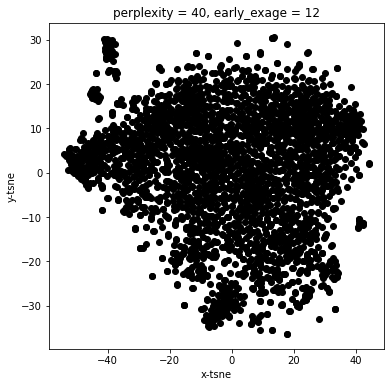

In [17]:
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(resu_tsne[:, 0],resu_tsne[:, 1], c='k')
ax.set_xlabel("x-tsne")
ax.set_ylabel("y-tsne")
ax.set_title('perplexity = {}, early_exage = {}'.format(p, ee))

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [18]:
#delete
def calICVar(X, labels):
   ...

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

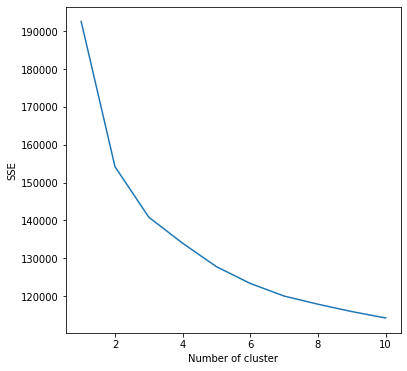

In [19]:
#Elbow method to determine the best number of cluster: the one with smallest distance
cluster_map = pd.DataFrame()
sse = {}
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k,random_state=3425).fit(scaledgenes)
    # -- save the group that a data belong according to the number of clusters
    cluster_map['cluster%d'%k] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize = (6,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

In [20]:
# cluster_map = pd.DataFrame()
# cluster_map['cluster'] = kmeans.labels_

In [21]:
cluster_map["tsne_x"] = resu_tsne[:,0]
cluster_map["tsne_y"] = resu_tsne[:,1]
cluster_map

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,tsne_x,tsne_y
0,0,0,2,0,2,1,0,7,8,6,5.355275,-18.090178
1,0,0,2,0,2,1,0,7,8,6,5.204103,-18.042870
2,0,0,0,3,4,5,2,0,8,7,-9.880248,-6.269420
3,0,0,2,2,1,5,0,3,3,9,17.517448,-2.226033
4,0,0,2,0,2,1,0,7,8,6,16.257772,-17.543884
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,0,0,2,0,2,1,6,6,7,6,15.433539,-12.939218
2598,0,0,2,0,2,1,0,7,8,6,-0.681992,-15.511111
2599,0,1,0,3,0,2,3,4,4,8,-35.710892,16.714203
2600,0,1,0,3,4,4,1,1,1,4,-32.701424,-7.547294


Text(0.5, 0, 'x_tsne')

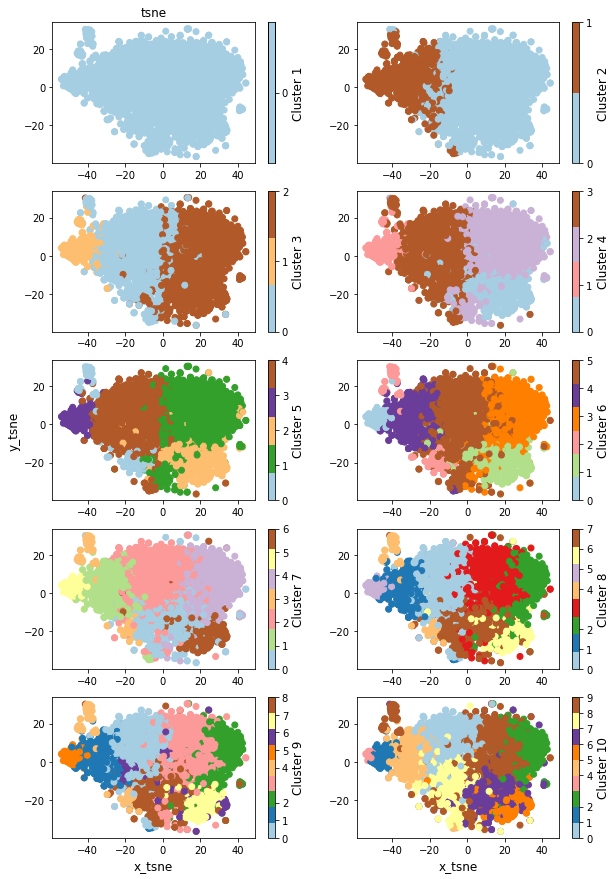

In [22]:
fig, ax = plt.subplots(5,2,figsize = (10,15))


cmap = plt.get_cmap('Paired', 1)
scatter = ax[0,0].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster1'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[0,0], ticks = [0])
cbar.set_label('Cluster 1', fontsize = 12)
ax[0,0].set_title("tsne", fontsize = 12)
# ax[0,0].set_xlabel("x_tsne", fontsize = 12)
ax[2,0].set_ylabel("y_tsne", fontsize = 12)

cmap = plt.get_cmap('Paired', 2)
scatter = ax[0,1].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster2'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[0,1], ticks = [0,1])
cbar.set_label('Cluster 2', fontsize = 12)

cmap = plt.get_cmap('Paired', 3)
scatter = ax[1,0].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster3'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[1,0], ticks = [0,1,2])
cbar.set_label('Cluster 3', fontsize = 12)

cmap = plt.get_cmap('Paired', 4)
scatter = ax[1,1].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster4'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[1,1], ticks = [0,1,2,3])
cbar.set_label('Cluster 4', fontsize = 12)

cmap = plt.get_cmap('Paired', 5)
scatter = ax[2,0].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster5'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[2,0], ticks = [0,1,2,3,4])
cbar.set_label('Cluster 5', fontsize = 12)

cmap = plt.get_cmap('Paired', 6)
scatter = ax[2,1].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster6'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[2,1], ticks = [0,1,2,3,4,5])
cbar.set_label('Cluster 6', fontsize = 12)

cmap = plt.get_cmap('Paired', 7)
scatter = ax[3,0].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster7'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[3,0], ticks = [0,1,2,3,4,5,6])
cbar.set_label('Cluster 7', fontsize = 12)

cmap = plt.get_cmap('Paired', 8)
scatter = ax[3,1].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster8'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[3,1], ticks = [0,1,2,4,5,6,7,8])
cbar.set_label('Cluster 8', fontsize = 12)

cmap = plt.get_cmap('Paired', 9)
scatter = ax[4,0].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster9'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[4,0], ticks = [0,1,2,4,5,6,7,8,9])
cbar.set_label('Cluster 9', fontsize = 12)
ax[4,0].set_xlabel("x_tsne", fontsize = 12)


cmap = plt.get_cmap('Paired', 9)
scatter = ax[4,1].scatter(resu_tsne[:,0], resu_tsne[:,1], c = cluster_map['cluster10'],cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax[4,1], ticks = [0,1,2,4,5,6,7,8,9,10])
cbar.set_label('Cluster 10', fontsize = 12)
ax[4,1].set_xlabel("x_tsne", fontsize = 12)


In [23]:
# #plots dont need to look exactly like mine
# geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
# pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
# pl.colorbar();


ideally you should be able to isolate the little islands, like the one on the left "at 7 hour". Try to set the starting guess in a way that may facilitate this

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

In [24]:
# index_cl3_0 = cluster_map[cluster_map["cluster3"] == 0].index
# index_cl3_1 = cluster_map[cluster_map["cluster3"] == 1].index
# index_cl3_2 = cluster_map[cluster_map["cluster3"] == 2].index

In [25]:
spatial.distance_matrix?

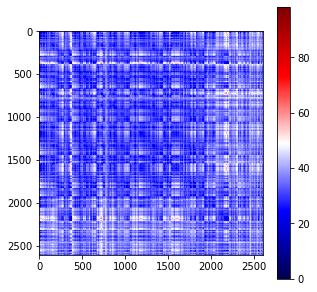

Figure: Distance matrix of the 2D projection obtained after TSNE. I choose a divergent color maps because it is easier
to see the intermedia value, the white, that is a distance of ~50.


In [26]:
plt.figure(figsize=(5,5))
ls = plt.imshow(spatial.distance_matrix(resu_tsne, resu_tsne), cmap = "seismic", clim = 
                (spatial.distance_matrix(resu_tsne, resu_tsne).min(), spatial.distance_matrix(resu_tsne, resu_tsne).max()));
plt.colorbar(ls)
plt.show()
print("Figure: Distance matrix of the 2D projection obtained after TSNE. I choose a divergent color maps because it is easier\n\
to see the intermedia value, the white, that is a distance of ~50.")

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

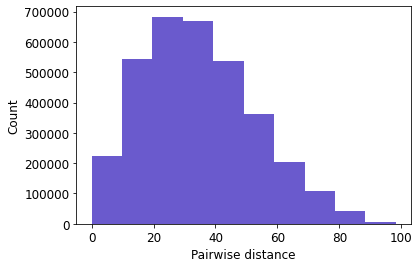

Figure: Histogram of the pairwise distances given by TSNE.


In [27]:
plt.hist(spatial.distance.pdist(resu_tsne), bins=10, color = "slateblue");
plt.xlabel("Pairwise distance", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()
print("Figure: Histogram of the pairwise distances given by TSNE.")

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [28]:
spatial.distance.pdist(resu_tsne).mean()

34.72391666450453

I need to use the data without the scale to obtain something with DBSCAN, if I used the scale one, I obtain or only a cluster or all outlayers.

In [29]:
np.random.seed(342)
db = cluster.DBSCAN(eps = 3,min_samples=6).fit(genes)
# print(collections.Counter(db.labels_))
db_map = pd.DataFrame()
db_map['cluster'] = db.labels_

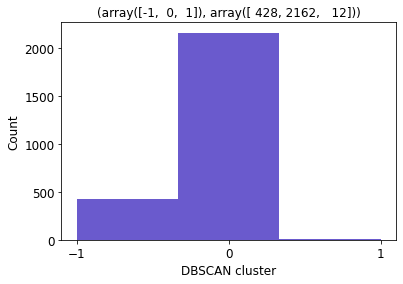

In [30]:
plt.hist(db.labels_, bins=3, color = "slateblue");
plt.title(np.unique(db.labels_,return_counts=True));
plt.xlabel("DBSCAN cluster", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks([-1,0,1], fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

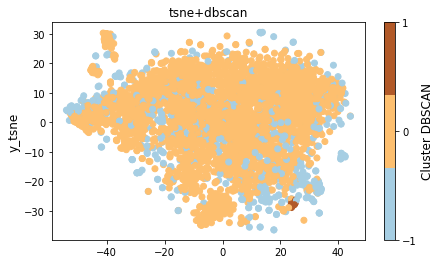

Figure: TSNE coordiantes and colored according to the clusters given by DBSCAN.
-1 represents the outlayer and DBSCAN divided the data in two clusters, 0 and 1.


In [31]:
fig, ax = plt.subplots(figsize = (7,4))


cmap = plt.get_cmap('Paired', 3)
scatter = ax.scatter(resu_tsne[:,0], resu_tsne[:,1], c = db_map['cluster'], cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax, ticks = [-1,0,1])
cbar.set_label('Cluster DBSCAN', fontsize = 12)
ax.set_title("tsne+dbscan", fontsize = 12)
# ax[0,0].set_xlabel("x_tsne", fontsize = 12)
ax.set_ylabel("y_tsne", fontsize = 12)
plt.show()
print("Figure: TSNE coordiantes and colored according to the clusters given by DBSCAN.\n\
-1 represents the outlayer and DBSCAN divided the data in two clusters, 0 and 1.")

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

The same as DBSCAN, I need to use the data without the scale to obtain the three groups, if I used the scale one, I obtain only two.

In [40]:
Z = linkage(genes, 'ward')

In [41]:
from scipy.cluster import hierarchy

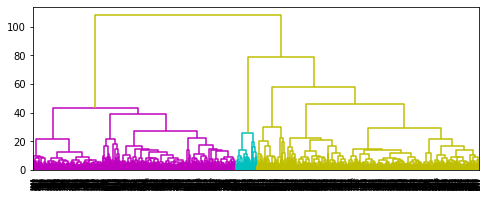

In [42]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])

fig, axes = plt.subplots( figsize=(8, 3))

dn1 = dendrogram(Z, ax=axes, above_threshold_color='y',

                           orientation='top')

# dn2 = dendrogram(Z, ax=axes[1],

#                            above_threshold_color='#bcbddc',

#                            orientation='right')



hierarchy.set_link_color_palette(None)  # reset to default after use

plt.show()

4b.3 repeat with a different linkage and comment on differences

In [50]:
Z = linkage(genes, 'weighted')


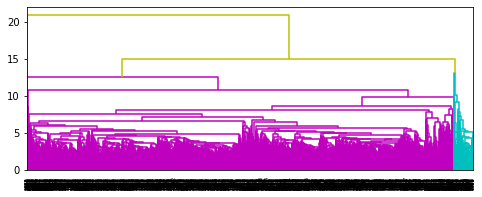

In [51]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])

fig, axes = plt.subplots( figsize=(8, 3))

dn1 = dendrogram(Z, ax=axes, above_threshold_color='y', orientation='top')

hierarchy.set_link_color_palette(None)  # reset to default after use

plt.show()

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
geneclustersAg = AgglomerativeClustering(n_clusters=3).fit(scaledgenes)

In [69]:
geneclustersAg.labels_

array([1, 1, 1, ..., 0, 0, 0])

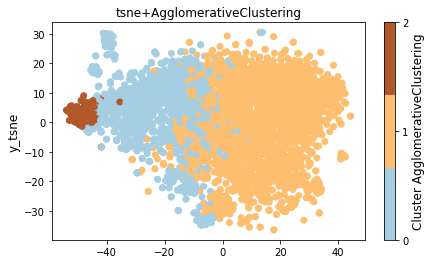

Figure: TSNE coordiantes and colored according to the three clusters given by AgglomerativeClustering.


In [70]:
fig, ax = plt.subplots(figsize = (7,4))


cmap = plt.get_cmap('Paired', 3)
scatter = ax.scatter(resu_tsne[:,0], resu_tsne[:,1], c = geneclustersAg.labels_, cmap = cmap)
cbar = plt.colorbar(scatter, ax = ax, ticks = [0,1,2])
cbar.set_label('Cluster AgglomerativeClustering', fontsize = 12)
ax.set_title("tsne+AgglomerativeClustering", fontsize = 12)
# ax[0,0].set_xlabel("x_tsne", fontsize = 12)
ax.set_ylabel("y_tsne", fontsize = 12)
plt.show()
print("Figure: TSNE coordiantes and colored according to the three clusters given by AgglomerativeClustering.")

In [ ]:
# geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative
